At the beginning, I will complete a convenient and whole pipeline to use the basic function in pymc.

This part focus on the code and object, rather than explaining the rationale behind the code. For more adcanced details, please refers to https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#pymc-overview.


In [1]:
import pymc as pm
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.16.2


In [3]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

Since pymc inference relies on sampling, it is important to set a random seed to ensure that the same results are produced in each iteration.

In [4]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

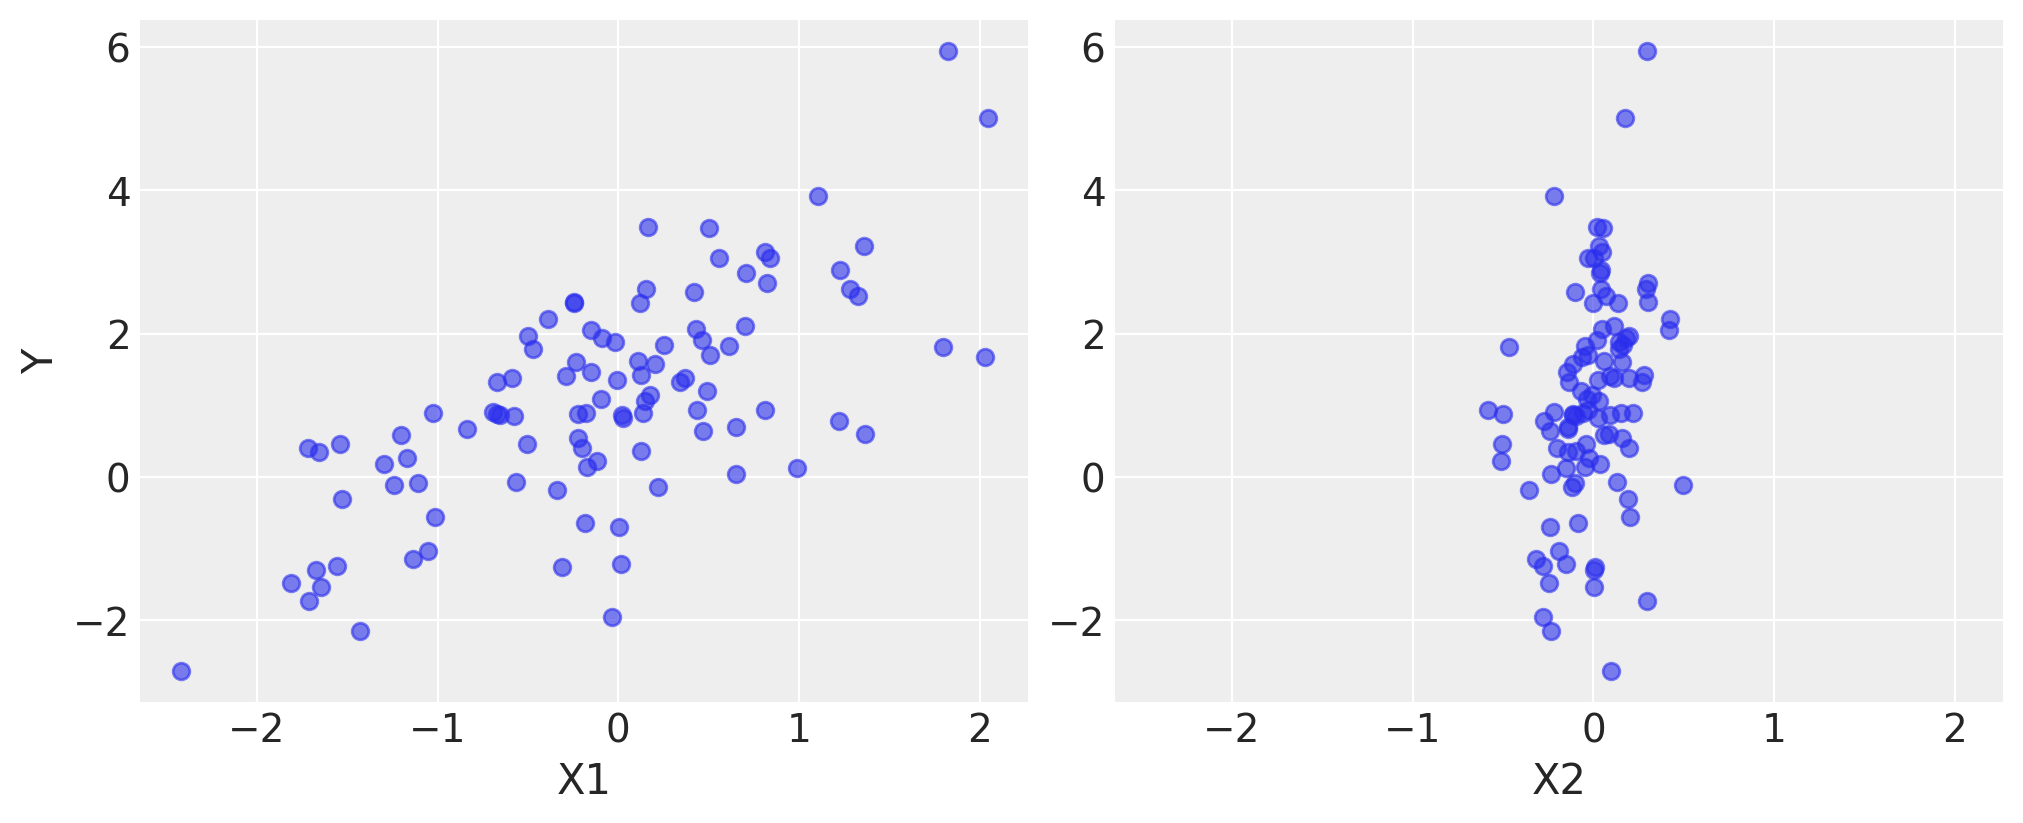

In [5]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

This section focus on generating simulation data using basic numoy， and is not related to pymc.

In [6]:
with pm.Model() as basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

<pre>
```
with pm.Model() as basic_model:
```
</pre>


pm.Model() is a container which the code of pymc will implement in it.

Maybe it is only callable with 'with'



<pre>
```
pm.Normal("alpha", mu=0, sigma=10)
、、、
</pre>


pm.normal() is a stochastic random variables, which is a pytensor object.

In this section, we want to try different attributions of this node.

In [7]:
pm.Normal

pymc.distributions.continuous.Normal

In [8]:
alpha

alpha ~ Normal(0, 10)

In [9]:
print(type(alpha))
print(isinstance(alpha, list))
print(dir(alpha))
print(id(alpha))

<class 'pytensor.tensor.variable.TensorVariable'>
False
['T', '__abs__', '__abstractmethods__', '__add__', '__and__', '__annotations__', '__array_priority__', '__bool__', '__ceil__', '__class__', '__class_getitem__', '__count__', '__delattr__', '__dict__', '__dir__', '__div__', '__divmod__', '__doc__', '__dot__', '__eq__', '__floor__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__invert__', '__iter__', '__le__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__orig_bases__', '__parameters__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__rdivmod__', '__rdot__', '__reduce__', '__reduce_ex__', '__repr__', '__repr_test_value__', '__rfloordiv__', '__rmatmul__', '__rmod__', '__rmul__', '__ror__', '__rpow__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__setitem__', '__sizeof__', '__slots__', '__str__', '__sub__', '__s

It is a tensortype.

In [10]:
# change the name of the variable
alpha.__setattr__("name", "alpha")

In [11]:
alpha

alpha ~ Normal(0, 10)

<pre>
```
with basic:
```
</pre>

this command can continue to 

In [12]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample(return_inferencedata=True, 
                      random_seed=RANDOM_SEED, 
                      chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [13]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [14]:
type(idata)

arviz.data.inference_data.InferenceData

If the presetation can be interacted, we can click the attribution of 'InferenceData'.


In [15]:
idata.posterior.alpha

<xarray.DataArray 'alpha' (chain: 4, draw: 1000)> Size: 32kB
array([[1.08876545, 1.21689003, 0.95177034, ..., 1.35185032, 1.05738935,
        1.29455782],
       [1.07399646, 1.27670873, 1.05082937, ..., 1.07733918, 1.2750728 ,
        1.14324633],
       [1.13669666, 1.04109541, 1.09155897, ..., 1.01779712, 1.01779712,
        1.09516971],
       [1.2790558 , 1.01745871, 1.39003871, ..., 1.26712558, 1.29653445,
        1.05971344]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 8kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999

In [16]:
idata.posterior.alpha.values

array([[1.08876545, 1.21689003, 0.95177034, ..., 1.35185032, 1.05738935,
        1.29455782],
       [1.07399646, 1.27670873, 1.05082937, ..., 1.07733918, 1.2750728 ,
        1.14324633],
       [1.13669666, 1.04109541, 1.09155897, ..., 1.01779712, 1.01779712,
        1.09516971],
       [1.2790558 , 1.01745871, 1.39003871, ..., 1.26712558, 1.29653445,
        1.05971344]])

In [17]:
idata.posterior["alpha"].sel(chain=slice(0, 2),draw=slice(0, 2))

<xarray.DataArray 'alpha' (chain: 3, draw: 3)> Size: 72B
array([[1.08876545, 1.21689003, 0.95177034],
       [1.07399646, 1.27670873, 1.05082937],
       [1.13669666, 1.04109541, 1.09155897]])
Coordinates:
  * chain    (chain) int64 24B 0 1 2
  * draw     (draw) int64 24B 0 1 2

according to 'draw','chain', select the corresponding  element.

In [18]:
with basic_model:
    # instantiate sampler
    step = pm.Slice() # it is a mcmc sampler

    # draw 5000 posterior samples
    slice_idata = pm.sample(5000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [alpha]
>Slice: [beta]
>Slice: [sigma]


Output()

Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 2 seconds.


In [19]:
az.summary(slice_idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.166,0.102,0.978,1.357,0.001,0.001,19413.0,15621.0,1.0
beta[0],1.126,0.111,0.916,1.330,0.001,0.001,19501.0,14976.0,1.0
beta[1],2.253,0.480,1.360,3.168,0.003,0.002,19695.0,14622.0,1.0
sigma,1.004,0.073,0.864,1.136,0.001,0.000,18389.0,14540.0,1.0


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

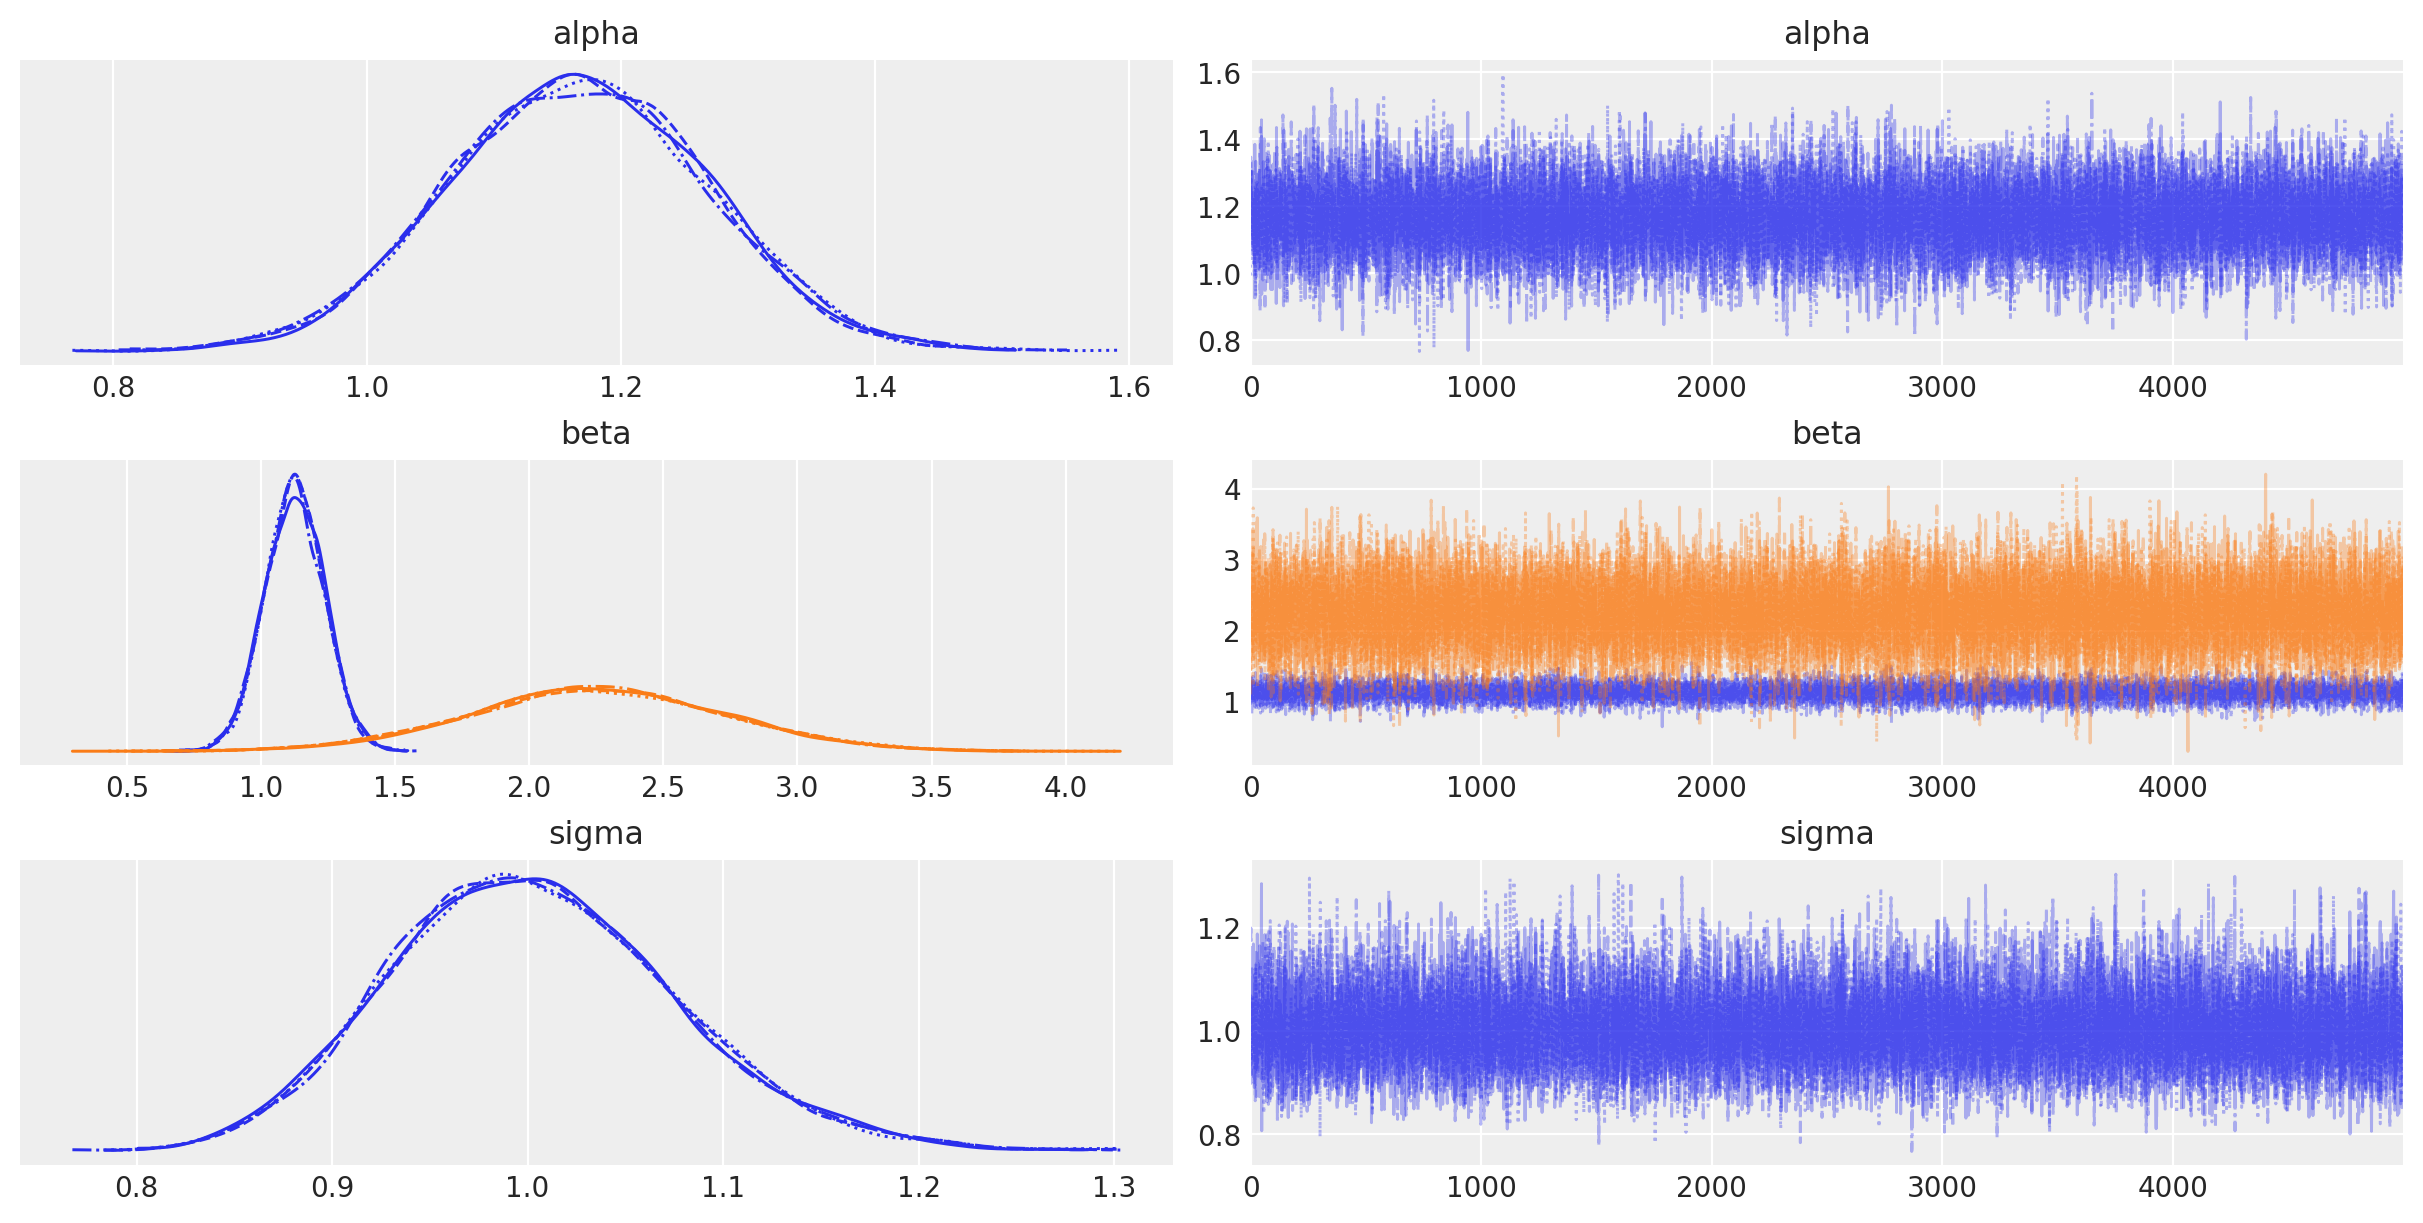

In [20]:
az.plot_trace(slice_idata)